In [115]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import pickle
import os
import colour

In [143]:
epoch = 0
#expdir = 'output/sawyer-reach-sim-2d/2019_05_23_11_51_43' # sawyer single goal, works!
#expdir = 'output/sawyer-reach-sim-2d/2019_05_29_14_25_52' # sawyer 5 training goals, overfits!
#expdir = 'output/point-robot/2019_05_30_12_49_06' # point mass 5 goals
#expdir = 'output/sawyer-reach-sim-2d/2019_05_30_12_33_40' # sawyer 5 goals, 2x data
#expdir = 'output/sawyer-reach-sim-2d/2019_06_03_16_16_41' # sawyer 100 goals, 2 exp trajs
#expdir = 'output/sawyer-reach-sim-2d/2019_06_03_23_29_30' # sawyer 100 goals, 10X reward scale
#expdir = 'output/point-robot/2019_06_06_16_58_20' # point robot, start at origin
#expdir = 'output/point-robot/2019_06_06_16_56_24' # point robot, circle of goals same scale as sawyer
#expdir = 'output/sawyer-reach-sim-2d/2019_06_20_11_32_47' # sawyer, goals all in one direction
expdir = 'output/sawyer-reach-sim-2d/2019_06_20_12_23_57' # sawyer, goals all in one direction, reward scale x10

def load_pkl(t, epoch):
    with open(os.path.join(expdir, 'eval_trajectories/task{}-epoch{}-run0.pkl'.format(t, epoch)), 'rb') as f:
        data = pickle.load(f)
    return data

def load_sim_pkl(t, epoch):
    with open(os.path.join(expdir, 'task{}_rollouts.pkl'.format(t)), 'rb') as f:
        data = pickle.load(f)
    return data

#### sample rollouts

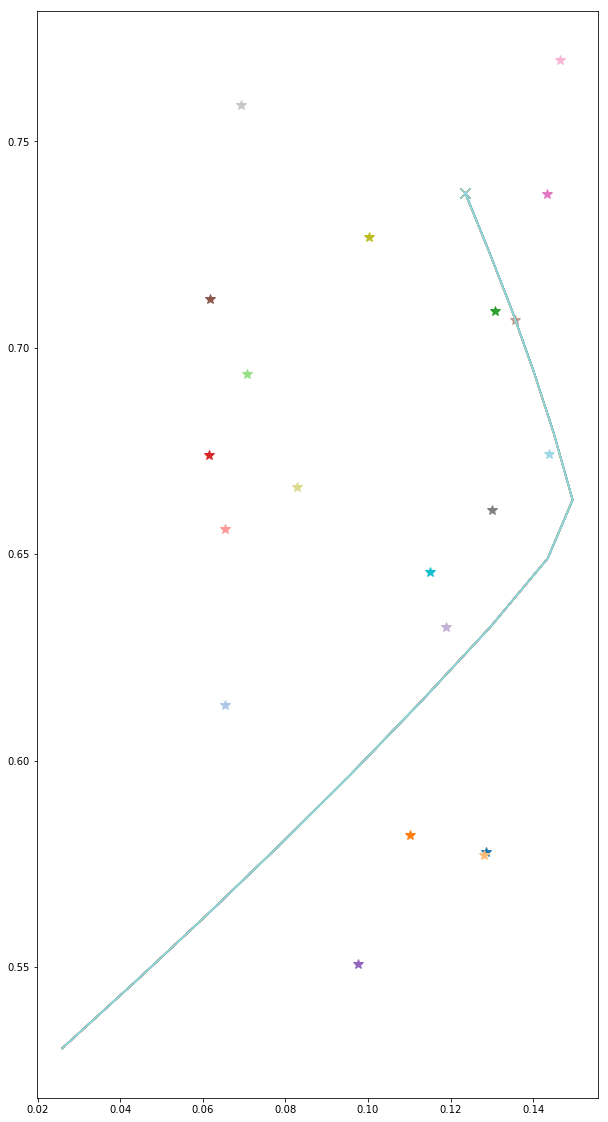

In [144]:
tasks = list(range(80, 100)) # If only 1 task, set to [0]
cmap = plt.get_cmap("tab20")
fig, axes = plt.subplots(1, 1, figsize=(12, 20))
#axes.set_xlim([-1.25, 1.25])
#axes.set_ylim([-1.25, 1.25])
#colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i,t in enumerate(tasks):
    all_paths = load_pkl(t, epoch)
    alphas = [0.2, 0.5, 0.9]
    for p,a in zip(all_paths[-1:], alphas[-1:]):
        states = p['observations'][1:][:,:2]
        acts = p['actions']
        rewards = p['rewards']
        axes.plot(states[:, 0], states[:, 1], '-', alpha=a, color=cmap(i))
        axes.plot(states[-1, 0], states[-1, 1], '-x', markersize=10, color=cmap(i))
        axes.set(aspect='equal')
    g = all_paths[0]['goal']
    #print('goal', g)
    axes.plot(g[0], g[1], '*', markersize=10, color=cmap(i))
    #axes.plot(0, 0, 'o', markersize=10, color='black')
